In [2]:
import numpy as np
from pymatgen.core import Structure, Lattice

nacl_struct = Structure.from_spacegroup("Fm-3m", Lattice.cubic(5.692), ["Na+", "Cl-"], [[0, 0, 0], [0.5, 0.5, 0.5]])

# Create a supercell of NaCl
nacl_supercell = nacl_struct.copy()
nacl_supercell.make_supercell(np.eye(3)*3)

#create a Na+ vacancy
nacl_vac = nacl_supercell.copy()
nacl_vac.remove_sites([0])  # remove the Na+ ion

Setup for the VASP calculation:
The following input files are created:
- INCAR: specifies calculation parameters (algorithm choice, settings)
- POSCAR: contains information about the crystal structure (lattice, atomic positions, species)
- KPOINTS: Defines the k-point point grid mesh for the brillouin sampling
- POTCAR: file that contains the pseudopotentials (of the species) needed for the calculation

In [3]:
from pymatgen.io.vasp.sets import MPRelaxSet

# Create the VASP input set for the structure with a Na+ vacancy
vasp_input_set = MPRelaxSet(nacl_vac)

# Write the input files to a directory (e.g., "vasp_inputs")
vasp_input_set.write_input("vasp_inputs", potcar_spec=True)


Investigation of the "bandstructure.json" file

Indirect band gap:  {'direct': False, 'energy': 0.1947000000000001, 'transition': 'R-M'}
Indirect band gap [eV]: 0.1947000000000001
Direct band gap [eV]: 0.7303999999999995


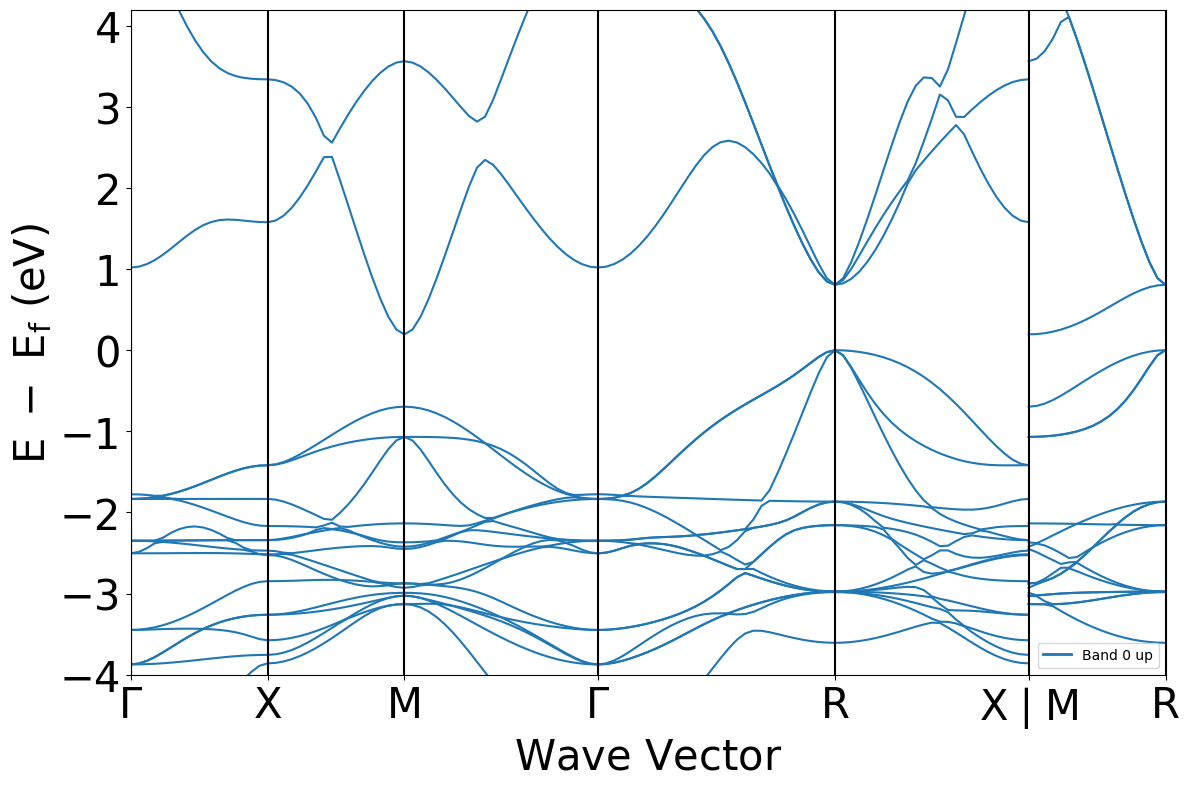

In [7]:
from pymatgen.electronic_structure.bandstructure import BandStructureSymmLine
from pymatgen.electronic_structure.plotter import BSPlotter
from pprint import pprint
import json
#load the band structure file
with open("bandstructure.json") as f:  # Automatically closes the file
    data = json.load(f)

#pprint(data)
# create an instance of the BandStructureSymmLine class using the loaded data
bandstructure = BandStructureSymmLine.from_dict(data)
"""
#branches at gamma point
branches = bs.get_branch(0)
print(branches)
"""
# create an instance of the BSPlotter class
bandstructure_plot = BSPlotter(bandstructure)
# Plot the band structure
bandstructure_plot.get_plot()

#get the band gap from an inherited method
band_gap_indirect = bandstructure.get_band_gap() #returns a dictionary with the indirect band gap
band_gap_direct = bandstructure.get_direct_band_gap() #returns float with the direct band gap
print("Indirect band gap: ", band_gap_indirect)
print(f"Indirect band gap [eV]: {band_gap_indirect['energy']}")
print(f"Direct band gap [eV]: {band_gap_direct}")


Run the "vasprun.xml.gz" file

/home/da36nik/miniconda3/envs/MI_06/lib/python3.10/site-packages/pymatgen/io/vasp/outputs.py:1118: UserWarning: No POTCAR file with matching TITEL fields was found in

  warnings.warn("No POTCAR file with matching TITEL fields was found in\n" + "\n  ".join(potcar_paths))


<class 'dict'>
Center of the p orbital: -2.1427783321069147 eV


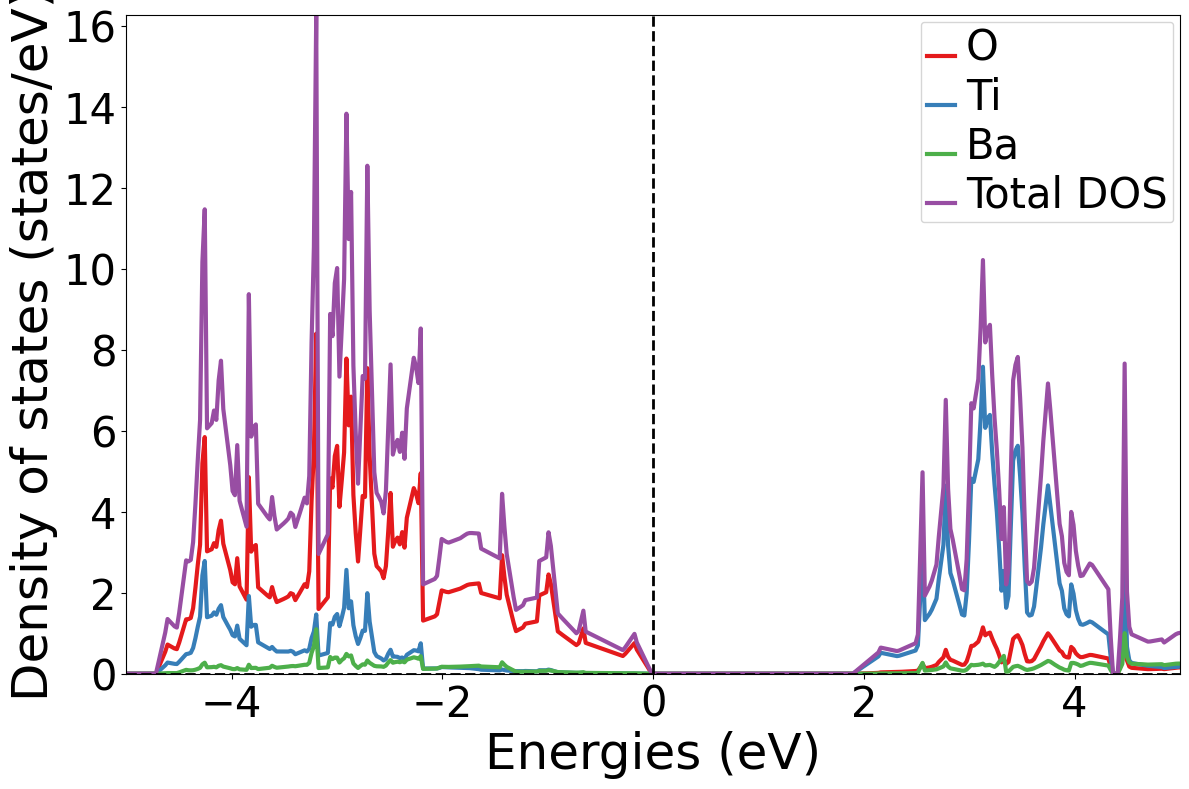

In [8]:
from pymatgen.io.vasp.outputs import Vasprun
from pymatgen.electronic_structure.plotter import DosPlotter
from pymatgen.electronic_structure.dos import OrbitalType
import matplotlib.pyplot as plt

# Works exactly like uncompressed files
vr = Vasprun("vasprun.xml.gz")
complete_dos = vr.complete_dos

print(type(complete_dos.get_element_dos()))

# Create a DosPlotter object
dos_plotter = DosPlotter()
# Add the total DOS to the plotter
dos_plotter.add_dos("Total DOS", complete_dos)
dos_plotter.add_dos_dict(complete_dos.get_element_dos())
# Add the PDOS to the plotter
dos_plotter.get_plot(xlim=[-5,5]) #plot the dos with the energy range from -5 to 5 eV

# compute the band center of the p orbital
p_center = complete_dos.get_band_center(band = OrbitalType.p, erange=(-5,5))
print(f"Center of the p orbital: {p_center} eV")

